In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
#define Main method here
def main():
    #importing data
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    #preprocessing data
    train_df = fix_columns(train_df)
    test_df = fix_columns_2(test_df)
    
    train_df = fix_na(train_df)
    test_df = fix_na(test_df)
    
    y = train_df['cancelled']
    X = train_df.drop(['cancelled'], axis = 1)
        
    X = scale_numeric(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=45)
    
    model = SVC(random_state=6)

    model = train(model, X_train, y_train)
    
    baseline = evaluate(model, X_test, y_test, bl=True)

    best_params = optimize_models(X_train, y_train)
    print(best_params)

    ## Build Best Model
    best_C= best_params['C']
    best_kernel = best_params['kernel']

    best_model = SVC(kernel = best_kernel, C= best_C, random_state=6)
    best_model = train(best_model, X_train, y_train)
    evaluate (best_model, X_test, y_test)
    
    
    

In [3]:
#Preprocess data
def fix_columns(df):
    df = df.drop(['order_id', 'order_date', 'reassigned_order', 'reassignment_method', 'reassignment_reason','order_time','session_time','rider_id',], axis = 1)
    df['allot_time'] = pd.to_datetime(df['allot_time'])
    df['accept_time'] = pd.to_datetime(df['accept_time'])
    t1 = df['accept_time'] - df['allot_time']
    df['accept_duration'] = t1
    df = df.drop(['allot_time','accept_time','pickup_time','cancelled_time','delivered_time','delivered_orders','alloted_orders'], axis = 1)
    df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
    return df
    
def fix_columns_2(df):
    df = df.drop(['order_id', 'order_date', 'reassigned_order', 'reassignment_method', 'reassignment_reason','order_time','session_time','rider_id',], axis = 1)
    df['allot_time'] = pd.to_datetime(df['allot_time'])
    df['accept_time'] = pd.to_datetime(df['accept_time'])
    t1 = df['accept_time'] - df['allot_time']
    df['accept_duration'] = t1
    df = df.drop(['allot_time','accept_time','delivered_orders','alloted_orders'], axis = 1)
    df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
    return df

def fix_na(df):
    df['undelivered_orders']=df['undelivered_orders'].fillna(1)
    df = df.dropna()
    return df

def scale_numeric(df):
    x = df.values 
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

In [26]:
# Train model
def train(model,X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [27]:
#Evaluate Model
def evaluate(model, X_test, y_test, plot = True, print_results=True, bl=False):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    if print_results:
      if bl:
        print('\n\nBaseline Model Performance on Test Dataset:\n')
      else:
        print('\n\nBest Model Performance on Test Dataset:\n')
      print('\nConfusion Matrix:\n',cm)
      print(f'Accuracy: {acc*100}%')

    if plot:
      sns.heatmap(cm, annot= True)
      plt.show()
    return

In [28]:
#Improve Model
def optimize_models(X_train, y_train):
  params = {'kernel':['rbf'], 'C':[1.0, 5.0, 10]}
  model = SVC(random_state=5)
  clf = GridSearchCV(model, params)
  clf.fit(X_train, y_train)
  return clf.best_params_



Baseline Model Performance on Test Dataset:


Confusion Matrix:
 [[133412      0]
 [  1524      2]]
Accuracy: 98.87059242022262%


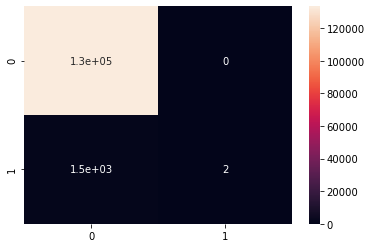

In [ ]:
# call the main function
if __name__ == '__main__':
    main()